In [1]:
import pandas as pd
import biogeme.results as res

## Read and Transform data

In [2]:
data = pd.read_csv('data/Data_HW_001.txt', sep='\t')
data['HIGH_INCOME'] = data['INCOME'].apply(lambda inc: int(inc == 3))
data['MEDIUM_INCOME'] = data['INCOME'].apply(lambda inc: int(inc == 2))
data['POPDENSE'] = data['POPDENSE'] / data['POPDENSE'].max()
data['HCHILD'] = data['NCHILD'].apply(lambda n: int(n>0))
data['AFRICAN'] = data['ETHN'].apply(lambda ethn: int(ethn == 2))
#data['COST'] = data['COST'] * 0.75
data['LINCCOST'] = data['INCOME'].apply(lambda inc: int(inc == 1)) * data['COST']
data['WBIKENBIKES'] = data['WALKBIKE'] * data['NBIKES']

In [3]:
data_org = data[['AFRICAN', 'CABLE', 'COST', 'HCHILD', 'LINCCOST', 'NEIGHB',
             'POPDENSE', 'PTRANSP', 'SMARTPH', 'WBIKENBIKES', 'WOMEN']]

In [4]:
data_org.head()

,AFRICAN,CABLE,COST,HCHILD,LINCCOST,NEIGHB,POPDENSE,PTRANSP,SMARTPH,WBIKENBIKES,WOMEN
0,0,0,0.855287,0,0.855287,0,0.031452,0,1,0,1
1,0,0,0.878066,1,0.000000,1,0.003339,0,0,0,1
2,0,1,0.743314,0,0.000000,1,0.024073,1,0,0,0
3,0,0,0.695418,0,0.695418,0,0.024772,0,1,0,3
4,0,1,0.403656,0,0.000000,1,0.296155,0,0,0,0


In [5]:
resultsFinalSpec = res.bioResults( pickleFile ='output/FinalSpec.pickle')
betas = resultsFinalSpec.getEstimatedParameters()['Value']
betas

ASC_YES              -1.603652
BETA_AFRICAN          0.431169
BETA_CABLE            0.199776
BETA_COST            -0.203227
BETA_HCHILD          -0.161121
BETA_LOWINC_COST     -0.319020
BETA_NEIGHB           0.443073
BETA_POPDENSE        -0.403432
BETA_PTRANSP         -0.347248
BETA_SMARTPH          0.131130
BETA_WBIKES_NBIKES    0.163967
BETA_WOMEN            0.084956
Name: Value, dtype: float64

Original Utility Functions

In [6]:
data['YES_ORG'] = data_org.values @ betas.iloc[1:].values + betas['ASC_YES'] 

Original probabilities of acceptance

In [7]:
import numpy as np
data['YES_PROB_ORG'] = np.exp(data['YES_ORG']) / (np.exp(data['YES_ORG']) + 1)

75% Cost

In [8]:
data['COST'] = data['COST'] * 0.75
data['LINCCOST'] = data['INCOME'].apply(lambda inc: int(inc == 1)) * data['COST']

In [9]:
data_75 = data[['AFRICAN', 'CABLE', 'COST', 'HCHILD', 'LINCCOST', 'NEIGHB',
             'POPDENSE', 'PTRANSP', 'SMARTPH', 'WBIKENBIKES', 'WOMEN']]

In [10]:
data['YES_75'] = data_75.values @ betas.iloc[1:].values + betas['ASC_YES'] 
data['YES_PROB_75'] = np.exp(data['YES_75']) / (np.exp(data['YES_75']) + 1)

In [11]:
data['DELTA_PROB'] = data['YES_PROB_75'] - data['YES_PROB_ORG'] 
data['DELTA_PROB'].mean()

0.009594942736141218

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
sns.distplot(data['YES_PROB_ORG'], label='Prob. of adopting the alt. with original cost')
sns.distplot(data['YES_PROB_75'], label='Prob. of adopting the alt. with 75% cost')
plt.legend()

In [13]:
data.pivot_table(columns='INCOME', values='DELTA_PROB')

INCOME,1,2,3
DELTA_PROB,0.013578,0.006558,0.006984


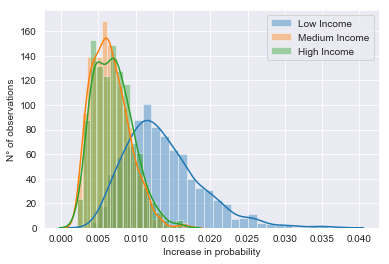

In [26]:
sns.distplot(data[data['INCOME'] == 1]['DELTA_PROB'], label='Low Income')
sns.distplot(data[data['INCOME'] == 2]['DELTA_PROB'], label='Medium Income')
sns.distplot(data[data['INCOME'] == 3]['DELTA_PROB'], label='High Income')
plt.xlabel('Increase in probability')
plt.ylabel('N° of observations')
plt.legend()
plt.savefig('figures/prob-increase-cost-75.png', dpi=100);